# **3.6 - Vivendo (e nem sempre) aprendendo** 🎢🌱
**Objetivo:** Implemente o registro da curva de aprendizado tanto dos dados de treino quanto de validação no código de redes neurais feito em Python puro nesta disciplina. Além de implementar, treine um modelo de rede neural em um conjunto de dados qualquer e mostre e interprete o gráfico das curvas de aprendizado.
***


### **Introdução** 💡

No contexto de redes neurais, uma curva de aprendizado é um gráfico que demonstra a alteração de performance do modelo ao longo das épocas de aprendizado. No eixo x, a passagem de épocas é indicada, enquanto o desempenho médio do modelo (calculado pela função de perda) é representado  pelo eixo y. Geralmente, utiliza-se tanto os dados de treino quanto os de validação para fazer esse plot, pois a comparação entre essas duas curvas pode fornecer *insights* importantes sobre o desempenho geral do modelo. 

Por exemplo: Uma curva relacionada aos dados de treino que decai rapidamente, indica que o modelo está se ajustando bem aos dados. No entanto, se esse comportamento não for também observado na curva de validação, isso pode ser um indicativo de que o modelo está sobreajustado, não apresentando desempenho adequado ao entrar em contato com novos dados. Ou seja, essa ferramenta é importante para a identificação de overfitting e underfitting, sendo, portanto, fundamental para o treinamento mais eficaz de redes neurais.

Nesse contexto, o presente notebook busca implementar o código para o plot de curvas de aprendizado na rede Multilayer Perceptron (MLP) implementada em Python puro [1]. Para verificar a sua aplicabilidade, o dataset utilizado será o "Crop price prediction", o qual tem como objetivo prever a colheita com base em fatores químicos do solo e ambientais. Tendo em vista o tamanho do dataset, apenas os dados referentes a colheita de café serão utilizados.

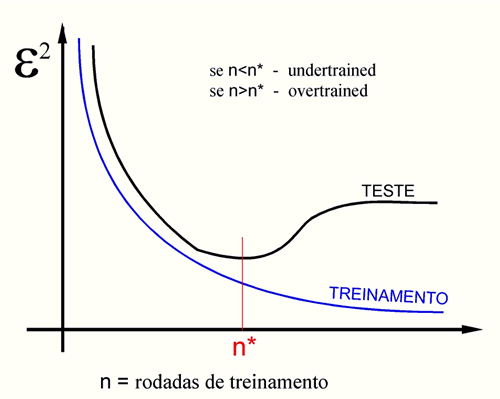
<p style="text-align: justify;">
[Figura 1: Exemplo de curva de aprendizado] [2]
</p>

### **Importação de bibliotecas & Definição do dataset** 📚

Para a tarefa em questão, as seguintes bibliotecas serão necessárias:

In [1]:
import zipfile
import os

import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Após isso, é preciso baixar o dataset que será utilizado.  O "Crop price prediction" está presente na plataforma Kaggle e é possível realizar o download por meio da biblioteca própria da plataforma Kaggle. 

In [2]:
!kaggle datasets download -d varshitanalluri/crop-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/varshitanalluri/crop-price-prediction-dataset
License(s): MIT
crop-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile("crop-price-prediction-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("crop-price-data")
os.listdir("crop-price-data")

['Crop_Yield_Prediction.csv']

In [4]:
df = pd.read_csv("crop-price-data\Crop_Yield_Prediction.csv")
display(df)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


Utilizando apenas os dados relativos a plantações de café, é possível separar as instâncias em dados de treino (80), validação (10) e teste (10).

In [5]:
df = df[df["Crop"] == "Coffee"]
display(df)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2100,91,21,26,26.333780,57.364700,7.261314,191.654941,Coffee,1020
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,Coffee,4900
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,Coffee,4600
2103,108,24,31,24.128325,56.181077,6.431900,147.275782,Coffee,560
2104,116,28,34,23.443723,60.395233,6.423211,122.210325,Coffee,3000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


In [6]:
random.seed(1203)

In [7]:
idxes_treino = []
while len(idxes_treino) < 80:
    sorteio = random.randint(0, len(df)-1)
    if sorteio not in idxes_treino:
        idxes_treino.append(sorteio)
    
df_treino = df.iloc[idxes_treino]
display(df_treino)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2126,86,26,27,27.131404,52.893683,6.081173,192.428038,Coffee,3800
2146,98,29,30,25.640044,61.032735,6.217974,199.473564,Coffee,1200
2123,104,26,30,24.407267,62.656926,6.410993,148.697736,Coffee,7000
2188,107,31,31,23.171246,52.978412,6.766184,153.120164,Coffee,1770
2133,82,24,33,26.535432,67.096081,6.809594,120.649443,Coffee,2250
...,...,...,...,...,...,...,...,...,...
2111,85,33,25,26.208114,52.509880,6.910824,189.094482,Coffee,4300
2178,105,18,35,23.526481,68.440307,6.743417,171.883994,Coffee,1780
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400
2175,95,37,35,27.313171,68.423339,6.348338,192.428814,Coffee,2700


In [8]:
idxes_validacao = []
while len(idxes_validacao) < 10:
  i = random.randint(0, len(df)-1)
  if i not in idxes_treino and i not in idxes_validacao :
    idxes_validacao.append(i)

df_validacao = df.iloc[idxes_validacao]
display(df_validacao)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2179,109,23,25,25.117110,68.480304,7.007332,194.877348,Coffee,530
2168,112,39,29,26.124922,63.374792,6.726529,147.803530,Coffee,4200
2177,117,37,32,23.106938,67.062305,6.787659,162.576961,Coffee,860
2114,95,39,29,27.351526,55.993750,7.134114,148.981253,Coffee,600
2156,108,35,25,23.981433,61.109351,6.971963,161.527909,Coffee,525
2138,106,40,30,23.426116,64.106515,6.779984,122.684741,Coffee,3800
2182,103,33,33,26.717174,50.501485,7.131436,126.807398,Coffee,2000
2148,85,35,32,26.249282,54.286178,6.854011,133.112023,Coffee,480
2131,118,21,34,24.385346,64.725431,7.234258,119.632411,Coffee,510
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,Coffee,4900


In [9]:
idxes_teste = []
usados = set(idxes_treino + idxes_validacao)
while len(idxes_teste) < 10:
  i = random.randint(0, len(df)-1)
  if i not in usados and i not in idxes_teste:
    idxes_teste.append(i)

df_teste = df.iloc[idxes_teste]
display(df_teste)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2160,94,26,27,26.366299,52.257385,7.456460,177.317616,Coffee,4000
2149,82,29,35,26.673772,52.242263,6.246872,156.154390,Coffee,2850
2121,83,21,28,25.567483,60.492446,7.466901,190.225784,Coffee,500
2120,100,24,28,25.595353,57.729208,7.101661,195.773325,Coffee,1750
2152,99,19,33,27.536455,55.516732,6.273742,130.637714,Coffee,500
2125,91,25,26,24.534600,66.997654,7.482414,180.505926,Coffee,3600
2122,120,23,28,25.673242,51.290436,6.877799,196.273637,Coffee,2300
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,Coffee,4600
2187,101,33,33,26.972516,62.018363,6.908671,142.861079,Coffee,1200
2185,116,36,25,27.578476,58.525343,6.172090,156.681037,Coffee,4300


In [10]:
X_treino = df_treino.drop(columns=["Crop", "Yield"]).values
y_treino = df_treino["Yield"].values.reshape(1, -1)

X_validacao = df_validacao.drop(columns=["Crop", "Yield"]).values
y_validacao = df_validacao["Yield"].values.reshape(1, -1)

X_teste = df_teste.drop(columns=["Crop", "Yield"]).values
y_teste = df_teste["Yield"].values.reshape(1, -1)

Para melhorar o desempenho da rede neural, ainda é válido normalizar os dados antes do treinamento.

In [11]:
normalizador_X = StandardScaler()
X_treino = normalizador_X.fit_transform(X_treino)
X_validacao = normalizador_X.transform(X_validacao)
X_teste = normalizador_X.transform(X_teste)

normalizador_y = StandardScaler()
y_treino = normalizador_y.fit_transform(y_treino.T).flatten()  
y_validacao = normalizador_y.transform(y_validacao.T).flatten()
y_teste = normalizador_y.transform(y_teste.T).flatten()

### **Treinamento da rede neural** 🧠

Utilizando a rede neural implementada em Python puro [1], é possível treinar a rede com os dados definidos anteriormente, a partir da utilização das classes necessárias para a construção da rede (Valor, Neurônio, Camada e MLP). Como função de ativação, a função Softplus será utilizada (para saber mais sobre essa função, confira o notebook "3.5 - Forma, função e ativação").

In [12]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data 
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        
        data = math.exp(self.data)

        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def log(self):
        """Realiza a operação: log(self)"""
        progenitor = (self,)
        data = math.log(self.data)
        operador_mae = "log"
        resultado = Valor(data, progenitor, operador_mae)

        def propagar_log():
            # O gradiente correto de log(x) é 1/x
            self.grad += resultado.grad * (1 / self.data)

        resultado.propagar = propagar_log

        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def softplus(self):
        """Realiza a operação: (self.exp() + 1).log()"""
        return (self.exp() + 1).log()
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [13]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada): 
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):

        assert len(x) == len(self.pesos) 
        
        soma = 0 
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies 
        dado_de_saida = soma.softplus()
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [14]:
class Camada:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):

            neuronio = Neuronio(num_dados_entrada) 
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x): 
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao) 
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] 
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [15]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            x = camada(x)
        #print(x)
        return x 
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

Em relação a arquitetura da rede, tem-se que a primeira camada será constituída por 7 neurônios (mesma quantidade de features), as camadas profundas por dois neurônios cada e a última, por se tratar de um problema de regressão, apenas um. Vale ressaltar que as camadas internas da rede, nesse caso, precisam ser pequenas em razão da quantidade reduzida de dados, pois a utilização de um modelo mais complexo poderia levar a um sobreajuste.

In [16]:
NUM_DADOS_DE_ENTRADA = 7
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [2,2]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Como método de avaliação, tanto para a análise gráfica da curva de aprendizado quanto para o treinamento da rede, será utilizado a raiz quadrada do erro quadrático médio (RMSE) [Fórmula 1]. Isso porque, como o RMSE fornece uma medida ns própria unidade de medida do target, essa forma de avaliação se destaca em quesito de interpretabilidade.

$$
RMSE = \sqrt{MSE} = \sqrt{\sum_{i=1}^{N} \frac{(y_i - \hat{y}_i) ^ 2}{N}}
$$


<p style="text-align: center;">
[Fórmula 1: Cálculo da raiz quadrada do erro quadrático médio (RMSE)]
</p>

Transpondo isso para código, é possível definir a função ``rmse`` para o cálculo dessa métrica.

In [17]:
def rmse(y_real, y_previsto): 
    rmse_soma = 0
    for i, j in zip(y_real, y_previsto):
        rmse_soma += (j - i)**2
    return (rmse_soma / len(y_real))**(1/2)

Para o treinamento da rede, a estrutura supracitada será utilizada para um treinamento em 1000 épocas (precisamos avaliar de forma detalhada o comportamento das funções de perda), com uma taxa de aprendizado igual a 0.1. Como principal diferencial entre a definição do ciclo de treinamento que será proposto e o da rede treinada em Python puro da referência 1 (utilizada como base para a construção da rede aqui utilizada) é a introdução de duas listas, resultado_loss_treino e resultado_loss_validacao, a fim de armazenar o resultado da função loss para esses dois conjuntos de dados (treino e validação). Esses dados serão posteriormente para o plot da curva de aprendizado. 

In [18]:
NUM_EPOCAS = 1000
TAXA_DE_APRENDIZADO = 0.1

resultado_loss_treino = []
resultado_loss_validacao = []

for epoca in range(NUM_EPOCAS): 
    
    y_pred_treino = []
    y_pred_validacao = []
    
    for exemplo in X_treino:
        previsao = mlp(exemplo)
        y_pred_treino.append(previsao)
        
    for exemplo in X_validacao:
        previsao = mlp(exemplo)
        y_pred_validacao.append(previsao)
        

    erros_treino  = []
    erros_validacao = [] 
              
    loss_treino = rmse(y_treino, y_pred_treino) 
                  
    resultado_loss_treino.append(loss_treino.data)
    
    for p in mlp.parametros():
        p.grad = 0

    loss_treino.propagar_tudo()

    for p in mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO
        
    
    loss_validacao = rmse(y_validacao, y_pred_validacao)

    resultado_loss_validacao.append(loss_validacao.data)


    
    print(f"O erro da época {epoca} é igual a: {loss_treino.data}")
   

O erro da época 0 é igual a: 1.913221855906299
O erro da época 1 é igual a: 1.7832750568934879
O erro da época 2 é igual a: 1.6865147111405876
O erro da época 3 é igual a: 1.6109607262430887
O erro da época 4 é igual a: 1.5498660111448426
O erro da época 5 é igual a: 1.4991617230978946
O erro da época 6 é igual a: 1.4562447849560785
O erro da época 7 é igual a: 1.4193636309719242
O erro da época 8 é igual a: 1.3872880004608992
O erro da época 9 é igual a: 1.3591218090988242
O erro da época 10 é igual a: 1.3341920295274459
O erro da época 11 é igual a: 1.3119799112810568
O erro da época 12 é igual a: 1.2920768004819498
O erro da época 13 é igual a: 1.2741548010633033
O erro da época 14 é igual a: 1.2579466988241381
O erro da época 15 é igual a: 1.2432318468502441
O erro da época 16 é igual a: 1.2298259965373222
O erro da época 17 é igual a: 1.2175738079948744
O erro da época 18 é igual a: 1.2063432234535651
O erro da época 19 é igual a: 1.1960211645206005
O erro da época 20 é igual a: 1

Com os dados armazenados é, possível, finalmente, plotar a curva de aprendizado.

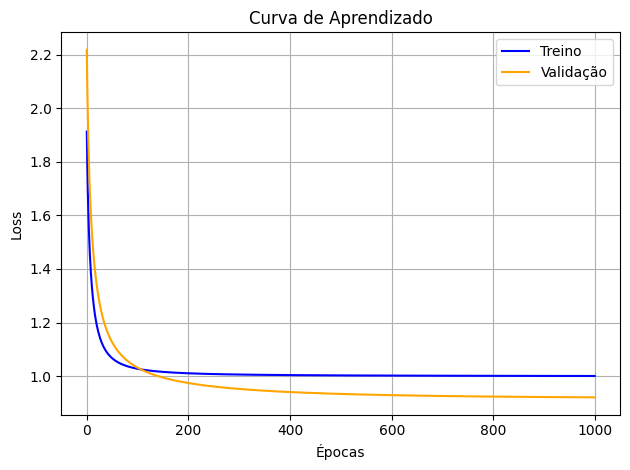

In [19]:
X_plot = list(range(0, 1000, 1))

plt.plot(X_plot, resultado_loss_treino, label="Treino", color="blue")
plt.plot(X_plot, resultado_loss_validacao, label="Validação", color="orange")

plt.title("Curva de Aprendizado")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Em relação ao gráfico obtido, temos a apresentação de um curioso fenômeno: Os dados de teste apresentaram menor perda do que os dados de treino! Temos que esse fator pode estar relacionado a pequena quantidade de dados: O split aleatório pode ter favorecido os dados de teste, sendo esses mais "fáceis" de prever, em comparação aos dados de treino. Logo, como o dataset é composto por poucos dados, pequenas flutuações podem gerar diferenças consideráveis nos resultados. Por outro lado, ao menos o gráfico não indica overfitting! Mesmo após 1000 épocas, o modelo apresenta boa capacidade de generalização, conseguindo prever de forma adequada dados ainda não vistos.

No entanto, temos que uma situação esperada consistiria, como demonstrado pela figura 1, na visualização de um trade-off, onde, após o treinamento de muitas épocas, seria possível observar um aumento da função de perda dos dados de validação. Nesse contexto, uma estratégia válida seria a introdução da **parada antecipada**, a qual consiste no interrompimento do treinamento após o ponto de degradação da função de loss do conjunto de validação (Early stop critterion), ou seja, quando a função de perda começa a diminuir (ou estabilizar) para os dados de treino, mas aumentar para os dados de teste. [4]

Finalmente, como forma de avaliar o desempenho final da rede, os dados de teste podem ser utilizados.

In [20]:
y_pred_teste = []
for exemplo in X_teste:
        previsao = mlp(exemplo)
        y_pred_teste.append(previsao)

loss_validacao = rmse(y_teste, y_pred_teste)

print(f"O RMSE para os dados de teste foi equivalente a: {loss_validacao.data:.4f}")

O RMSE para os dados de teste foi equivalente a: 0.6935


O resultado nos dados de teste é consistente com o observado pelos dados de validação, indicando, novamente, que a rede é efetiva para a previsão de novos dados.

### **Conclusão** 🧪

Ao final do notebook, foi possível implementar o plot da curva de aprendizado a partir da rede MLP construída em Python puro. Como principal diferença para o código original, tem-se que a função de avaliação de desempenho do modelo foi alterada - de soma dos erros quadráticos (SSE) para raiz quadrática da média dos erros quadráticos (RMSE) - e que os dados da função de perda, tanto para os dados de validação quanto para os dados de treino, foram armazenadas em listas, possibilitando a realização do plot. Como resultado, diferentemente do que era esperado, foi possível observar uma diminuição contínua dos dados da função de perda relativa aos dados de validação, o que pode estar relacionado com as "flutuações" no cálculo das métricas ocasionadas pelo pequeno tamanho do datataset. Se o resultado fosse o observado convencionalmente, seria possível observar um trade-off, onde o erro relativo aos dados de validação começaria a aumentar ao passar das épocas. Esse indicativo seria útil para a identificação de um ponto onde seria possível a implementação de "Parada antecipada", o qual consiste em um ponto final para o treinamento da rede (Early stop critterion), a fim de evitar sobreajuste. Ademais, consegui compreender de forma mais abrangente a forma de separação de um dataset para a construção de uma rede neural (treino, validação e teste).

### **Bibliografia** 🗃️

[1] Referência Principal (construção da rede neural em Python puro): Andrej Karpathy. The spelled-out intro to neural networks and backpropagation: building micrograd (2022). https://www.youtube.com/watch?v=VMj-3S1tku0

[2] Freud e as Redes Neurais. Bate Byte. Disponível em: <https://www.batebyte.pr.gov.br/Pagina/Freud-e-Redes-Neurais-0>. Acesso em: 8 abr. 2025.

[3] CYBORG. What is Early Stopping in Deep Learning? Disponível em: <https://cyborgcodes.medium.com/what-is-early-stopping-in-deep-learning-eeb1e710a3cf>. Acesso em: 8 abr. 2025.

[4] ROSEBROCK, Adrian. Why is my validation loss lower than my training loss? Disponível em: <https://pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/>. Acesso em: 8 abr. 2025.
